In [2]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
import pandas as pd


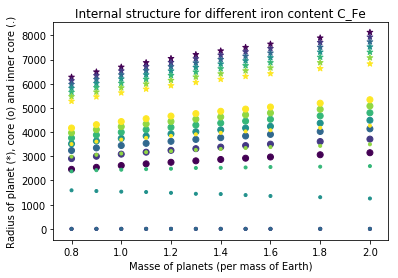

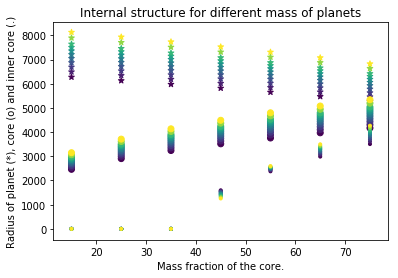

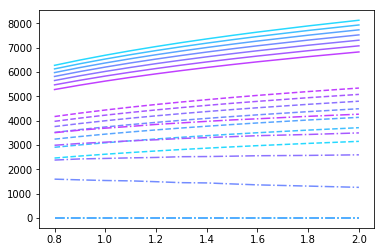

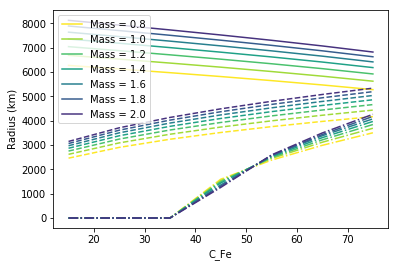

In [3]:
## File data_IS.res : all runs

filename = "data/data_IS.res"
names = ["M", "C_Fe", "C_FeM", "Psurf", "Rp", "Rc", \
           "RRc", "gs", "rho_c", "rho_m", "Cp_c",\
          "Cp_m", "alpha_c", "alpha_m", "k_m", \
           "shear_m", "Gruneisen", "Ts",  "Tc_adiab", \
         "pc", "DTc", "Tc0", "pc0", "gr_c",
         "r_ICB", "p_ICB", "iter_outer", "iter_inner"] 

data = pd.read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names, index_col=False)

data = data[data.C_FeM == 0]


fig, ax = plt.subplots()
ax.scatter(data["M"],data["Rp"]/1e3, c=data["C_Fe"], marker="*")
ax.scatter(data["M"],data["Rc"]/1e3, c=data["C_Fe"], marker="o")
ax.scatter(data["M"],data["r_ICB"]/1e3, c=data["C_Fe"], marker=".")

ax.set_ylabel("Radius of planet (*), core (o) and inner core (.)")
ax.set_xlabel("Masse of planets (per mass of Earth)")
ax.set_title("Internal structure for different iron content C_Fe")
plt.savefig("internal_structure.pdf")


fig, ax = plt.subplots()
ax.scatter(data["C_Fe"],data["Rp"]/1e3, c=data["M"], marker="*")
ax.scatter(data["C_Fe"],data["Rc"]/1e3, c=data["M"], marker="o")
ax.scatter(data["C_Fe"],data["r_ICB"]/1e3, c=data["M"], marker=".")

ax.set_ylabel("Radius of planet (*), core (o) and inner core (.)")
ax.set_xlabel("Mass fraction of the core.")
ax.set_title("Internal structure for different mass of planets")
plt.savefig("internal_structure_CFe.pdf")



fig, ax = plt.subplots()
CFe = [15, 25, 35, 45, 55, 65, 75]
mycm = plt.cm.cool(np.array(CFe)/100.)

for i, C in enumerate(CFe):
    data_Fe = data[data["C_Fe"]==C]
    ax.plot(data_Fe["M"],data_Fe["Rp"]/1e3,  color=mycm[i])
    ax.plot(data_Fe["M"],data_Fe["Rc"]/1e3, '--', color=mycm[i])
    ax.plot(data_Fe["M"],data_Fe["r_ICB"]/1e3, '-.', color=mycm[i])
    
    
fig, ax = plt.subplots()
Masses = [0.8, 1.,  1.2,  1.4,  1.6, 1.8, 2.]
mycm = plt.cm.viridis_r((np.array(Masses)-0.8)/1.4)

for i, M in enumerate(Masses):
    data_Fe = data[data["M"]==M]
    ax.plot(data_Fe["C_Fe"],data_Fe["Rp"]/1e3,  color=mycm[i], label="Mass = {}".format(M))
    ax.plot(data_Fe["C_Fe"],data_Fe["Rc"]/1e3, '--', color=mycm[i], label="")
    ax.plot(data_Fe["C_Fe"],data_Fe["r_ICB"]/1e3, '-.', color=mycm[i], label="")
    
ax.set_ylabel("Radius (km)")
ax.set_xlabel("C_Fe")
ax.legend()
plt.savefig("Radius_planet_core_inner_core.pdf")

8129253.36278


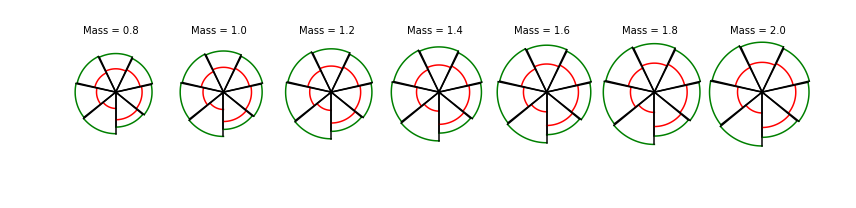

In [4]:


def x(r, theta):
    return r*np.sin(theta)
def y(r, theta):
    return r*np.cos(theta)

n_CFe = 7
n_M = 7
n_t = 50
Masses = [0.8, 1., 1.2, 1.4, 1.6, 1.8, 2.]
CFe = [15., 25., 35., 45., 55., 65., 75.]
theta = np.linspace(-np.pi, np.pi, n_CFe*n_t)
max_R = data["Rp"].max()
print(max_R)

fig, ax = plt.subplots(figsize=[12, 3])

for j, mass in enumerate(Masses): 
    ax.text((j-0.3)*max_R*2, max_R*1.1, "Mass = {}". format(mass))
    for i, Fe in enumerate(CFe):
        th = theta[i*n_t:i*n_t+n_t]
        r = data[(data["M"]==mass) & (data["C_Fe"]==Fe)] 
        Rp = r.iloc[0]["Rp"]
        Rc = r.iloc[0]["Rc"]
        
        ax.plot(Rp*np.sin(th)+2*j*max_R, Rp*np.cos(th), 'green')
        ax.plot(Rc*np.sin(th)+2*j*max_R, Rc*np.cos(th), 'red')
        ax.plot([0, Rp*np.sin(th[0])]+2*j*max_R, [0, Rp*np.cos(th[0])], "black")
        ax.plot([0, Rp*np.sin(th[-1])]+2*j*max_R, [0, Rp*np.cos(th[-1])], "black")
plt.axis('equal')
#ax.set_ylim([-max_R, max_R])
#ax.set_xlim([-max_R, 13*max_R])
plt.axis("off")
plt.tight_layout()
plt.savefig("radius_poster.pdf")
        

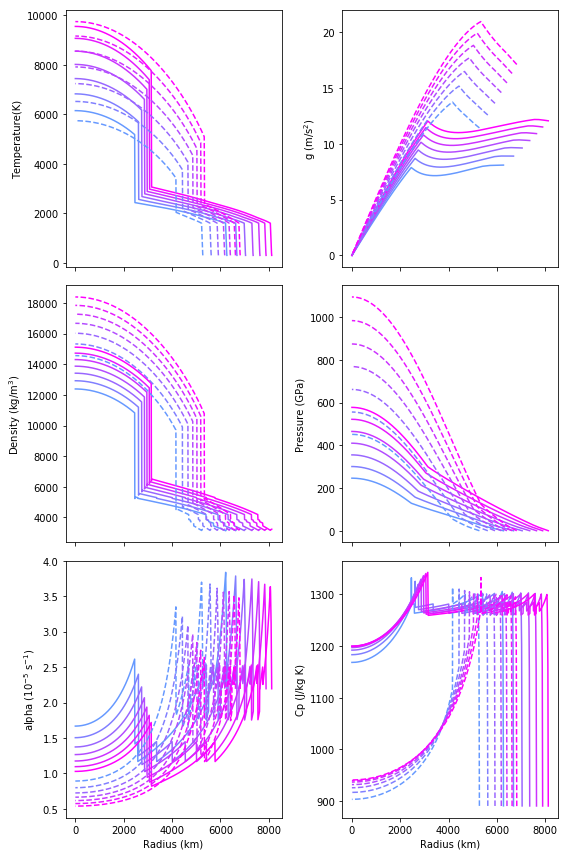

In [7]:
## radial profiles

names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
         "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

#filename = "/home/marine/ownCloud/Research/Projets/Core_size/October2018/data_prof_M_ 2.0_Fe_45.0000_FeM_ 0.0000.res"

fig, ax3 = plt.subplots(3,2, figsize=[8,12], sharex=True)


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.]    
mycm = plt.cm.cool(np.array(Masses)/2.)

def figure(data, i, symb="-"): 
    ax3[0,0].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i])
    ax3[0,1].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i])
    ax3[1,0].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i])
    ax3[1,1].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i])
    ax3[2,0].plot(data["r(m)"]/1e3, data["alpha(10^-5 1/s)"], symb, color=mycm[i])
    ax3[2,1].plot(data["r(m)"]/1e3, data["Cp(J/kgK)"], symb, color=mycm[i])

    
files = ["data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.2_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.4_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.6_Fe_15.0000_FeM_ 0.0000.res",
        "data_prof_M_ 1.8_Fe_15.0000_FeM_ 0.0000.res",
        "data_prof_M_ 2.0_Fe_15.0000_FeM_ 0.0000.res"]

    
for i, (M, filename) in enumerate(zip(Masses, files)):
    data = pd.read_csv("data/"+filename, skipinitialspace=True, sep=" ", names=names)
    figure(data, i)
    
files = ["data_prof_M_ 0.8_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.2_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.4_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.6_Fe_75.0000_FeM_ 0.0000.res",
        "data_prof_M_ 1.8_Fe_75.0000_FeM_ 0.0000.res",
        "data_prof_M_ 2.0_Fe_75.0000_FeM_ 0.0000.res"]
for i, (M, filename) in enumerate(zip(Masses, files)):
    data = pd.read_csv("data/"+filename, skipinitialspace=True, sep=" ", names=names)
    figure(data, i, '--')


ax3[0,0].set_ylabel("Temperature(K)")
ax3[0,1].set_ylabel("g (m/s$^2$)")
ax3[1,0].set_ylabel("Density (kg/m$^3$)")
ax3[1,1].set_ylabel("Pressure (GPa)")
ax3[2,0].set_ylabel("alpha (10$^{-5}$ s$^{-1}$)")
ax3[2,1].set_ylabel("Cp (J/kg K)")
ax3[2,0].set_xlabel("Radius (km)")
ax3[2,1].set_xlabel("Radius (km)")
plt.tight_layout()
plt.savefig("profiles.pdf")


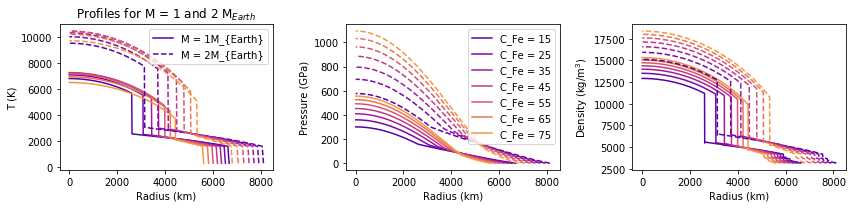

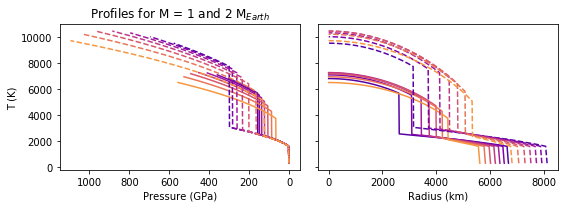

In [11]:
fig, ax = plt.subplots(1,3, sharex=True,figsize=[12,3])

fig2, ax2 = plt.subplots(1,2, sharey=True,figsize=[8,3])

names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
         "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
    
files = ["data_prof_M_ 1.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_25.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_35.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_45.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_55.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_65.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_75.0000_FeM_ 0.0000.res"]

CFe = [15, 25, 35, 45, 55, 65, 75]  
mycm = plt.cm.plasma(np.array(CFe)/100.)

def figure(data, i, symb="-", label=None, M=1): 
    ax[0].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=label)
    if M == 1: 
        label = "C_Fe = {}".format(CFe[i])
    else: label == ""
    if label == "M = 2M_{Earth}": label=""
    ax[1].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i], label=label)
    ax[2].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i], label=label)
    ax2[0].plot(data["p(GPa)"], data["T(K)"], symb, color=mycm[i], label=label)
    ax2[1].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=label)

    
for i, (C, filename) in enumerate(zip(CFe, files)):
    data = pd.read_csv("data/"+filename, skipinitialspace=True, sep=" ", names=names)
    if i == 0.:
        label = "M = 1M_{Earth}"
    else: label = ""
    figure(data, i, label=label)
    
    
    
files = ["data_prof_M_ 2.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_25.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_35.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_45.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_55.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_65.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_75.0000_FeM_ 0.0000.res"]

    
for i, (C, filename) in enumerate(zip(CFe, files)):
    data = pd.read_csv("data/"+filename, skipinitialspace=True, sep=" ", names=names)
    if i == 0.:
        label = "M = 2M_{Earth}"
    else: label = ""
    figure(data, i, "--", label=label, M=2)
    
ax[0].set_ylabel("T (K)")
ax[1].set_ylabel("Pressure (GPa)")
ax[2].set_ylabel("Density (kg/m$^3$)")
ax[2].set_xlabel("Radius (km)")
ax[1].set_xlabel("Radius (km)")
ax[0].set_xlabel("Radius (km)")

ax[0].set_title("Profiles for M = 1 and 2 M$_{{Earth}}$")
plt.figure(fig.number)
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig("profiles_M1_2Earth.pdf")

plt.figure(fig2.number)
ax2[0].set_xlabel("Pressure (GPa)")
ax2[1].set_xlabel("Radius (km)")
ax2[0].set_ylabel("T (K)")
ax2[0].set_title("Profiles for M = 1 and 2 M$_{{Earth}}$")
plt.tight_layout()
ax2[0].invert_xaxis()
plt.savefig("pressure_Temperature_1_2MEarth.pdf")

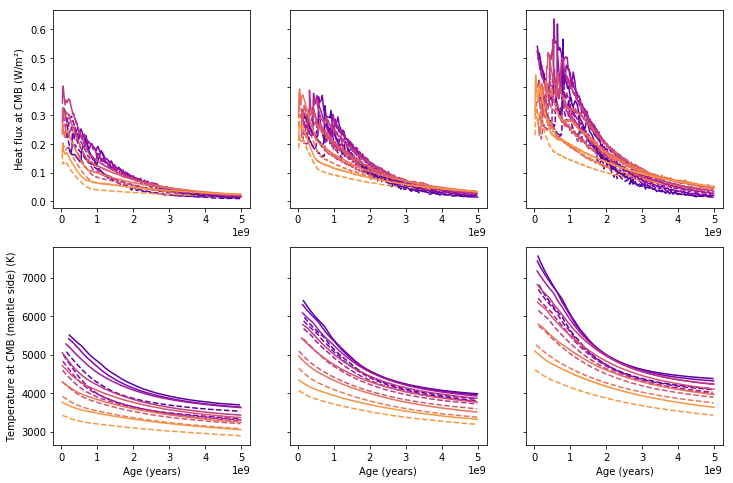

In [12]:
# temporal variations

names = ["t(yr)", "qc(W/m²)", "TCMB(K)"] 
#data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names)

#data.plot("t(yr)", "qc(W/m²)")

M = [8, 10, 12, 14, 16, 20]
Fe = [15, 25, 35, 45, 55, 65, 75]
fig, ax = plt.subplots(2, 3,sharey='row', figsize=[12,8])

cmap = plt.cm.plasma(np.array(Fe)/100)

for mass in M:
    for i, CFe in enumerate(Fe):
        filename = "data/"+"qc_T_M{:02d}_Fe{:02d}_FeM00.txt".format(mass,CFe)
        data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, skiprows=[0])
        if mass < 12:
            if mass == 8: symb = "--"
            else: symb = "-"
            ax[0,0].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,0].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])
        elif mass < 16:
            if mass == 12: symb = "--"
            else: symb = "-"
            ax[0,1].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,1].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])
        else:
            if mass == 16: symb = "--"
            else: symb = "-"
            ax[0,2].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,2].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])

ax[0,0].set_ylabel("Heat flux at CMB (W/m$²$)")
ax[1,0].set_ylabel("Temperature at CMB (mantle side) (K)")

ax[1,1].set_xlabel("Age (years)")
ax[1,2].set_xlabel("Age (years)")
ax[1,0].set_xlabel("Age (years)")

plt.savefig("time_evolution_onlyCFeM0.pdf")

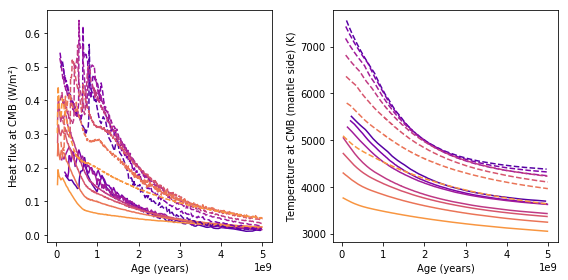

In [15]:
# temporal variations

filename = "qc_T_M10_Fe45_FeM0.txt"
names = ["t(yr)", "qc(W/m²)", "TCMB(K)"] 
#data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names)

#data.plot("t(yr)", "qc(W/m²)")


files_10 = ["qc_T_M10_Fe15_FeM0.txt",
         "qc_T_M1_Fe25_FeM0.txt",]

M = [10, 20]
Fe = [15, 25, 35, 45, 55, 65, 75]
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

cmap = plt.cm.plasma(np.array(Fe)/100)

for mass in M:
    for i, CFe in enumerate(Fe):
        filename = "qc_T_M{:02d}_Fe{:02d}_FeM00.txt".format(mass,CFe)
        data = pd.read_csv("data/"+filename, skipinitialspace=True, sep=" ", names=names, skiprows=[0])
        if mass == 10: 
            symb = "-"
            label_q = "C_Fe = {}".format(CFe)
        else: 
            symb = "--"
            label_q = ""
        ax[0].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
        ax[1].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])

ax[0].set_ylabel("Heat flux at CMB (W/m$²$)")
ax[1].set_ylabel("Temperature at CMB (mantle side) (K)")

ax[0].set_xlabel("Age (years)")
ax[1].set_xlabel("Age (years)")

plt.tight_layout()
plt.savefig("time_evolution_onlyCFeM0_mass_1&2.pdf")

In [ ]:

names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
         "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

#filename = "/home/marine/ownCloud/Research/Projets/Core_size/October2018/data_prof_M_ 2.0_Fe_45.0000_FeM_ 0.0000.res"

fig, ax3 = plt.subplots(3,2, figsize=[8,12], sharex=True)


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.]    
mycm = plt.cm.cool(np.array(Masses)/2.)

def figure(data, i, symb="-"): 
    ax3[0,0].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i])
    ax3[0,1].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i])
    ax3[1,0].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i])
    ax3[1,1].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i])
    ax3[2,0].plot(data["r(m)"]/1e3, data["alpha(10^-5 1/s)"], symb, color=mycm[i])
    ax3[2,1].plot(data["r(m)"]/1e3, data["Cp(J/kgK)"], symb, color=mycm[i])

    
files = ["data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.2_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.4_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.6_Fe_15.0000_FeM_ 0.0000.res",
        "data_prof_M_ 1.8_Fe_15.0000_FeM_ 0.0000.res",
        "data_prof_M_ 2.0_Fe_15.0000_FeM_ 0.0000.res"]

    
for i, (M, filename) in enumerate(zip(Masses, files)):
    data = pd.read_csv("data/"+filename, skipinitialspace=True, sep=" ", names=names)
    figure(data, i)
    
files = ["data_prof_M_ 0.8_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.2_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.4_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.6_Fe_75.0000_FeM_ 0.0000.res",
        "data_prof_M_ 1.8_Fe_75.0000_FeM_ 0.0000.res",
        "data_prof_M_ 2.0_Fe_75.0000_FeM_ 0.0000.res"]
for i, (M, filename) in enumerate(zip(Masses, files)):
    data = pd.read_csv("data/"+filename, skipinitialspace=True, sep=" ", names=names)
    figure(data, i, '--')


ax3[0,0].set_ylabel("Temperature(K)")
ax3[0,1].set_ylabel("g (m/s$^2$)")
ax3[1,0].set_ylabel("Density (kg/m$^3$)")
ax3[1,1].set_ylabel("Pressure (GPa)")
ax3[2,0].set_ylabel("alpha (10$^{-5}$ s$^{-1}$)")
ax3[2,1].set_ylabel("Cp (J/kg K)")
ax3[2,0].set_xlabel("Radius (km)")
ax3[2,1].set_xlabel("Radius (km)")
plt.tight_layout()
plt.savefig("profiles.pdf")